## Download dataset


In [ ]:
import requests
import zipfile
from pathlib import Path
import os

dataset_link = 'https://www.kaggle.com/api/v1/datasets/download/trolukovich/food11-image-dataset'
dataset_path = Path('Dataset')
img_path = dataset_path / 'food_images'

if img_path.is_dir():
  print(f"Dataset already exists")
else:
  img_path.mkdir(parents=True, exist_ok=True)
  print(f'Downloading Dataset from {dataset_link}')
  datasetZFile = requests.get(dataset_link)
  with open(dataset_path / "Dataset.zip", 'wb') as f:
    f.write(datasetZFile.content)
    print('Dataset downloaded successfully')

with zipfile.ZipFile(dataset_path / "Dataset.zip", 'r') as z:
  print(f"Unzipping...")
  z.extractall(img_path)
  print(f"All done")

Dataset downloaded successfully
Unzipping...
All done


## getting one with data


In [ ]:
!ls Dataset/food_images/

evaluation  training  validation


In [ ]:
train_path = Path('./Dataset/food_images/training')
val_path = Path('./Dataset/food_images/validation')
test_path = Path('./Dataset/food_images/evaluation')

train_path, val_path, test_path

(PosixPath('Dataset/food_images/training'),
 PosixPath('Dataset/food_images/validation'),
 PosixPath('Dataset/food_images/evaluation'))

In [ ]:
for dirpath, dirnames, filenames in os.walk(train_path):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')
print()
for dirpath, dirnames, filenames in os.walk(val_path):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')
print()
for dirpath, dirnames, filenames in os.walk(test_path):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 11 directories and 0 images in Dataset/food_images/training
There are 0 directories and 848 images in Dataset/food_images/training/Fried food
There are 0 directories and 855 images in Dataset/food_images/training/Seafood
There are 0 directories and 1325 images in Dataset/food_images/training/Meat
There are 0 directories and 429 images in Dataset/food_images/training/Dairy product
There are 0 directories and 280 images in Dataset/food_images/training/Rice
There are 0 directories and 1500 images in Dataset/food_images/training/Dessert
There are 0 directories and 994 images in Dataset/food_images/training/Bread
There are 0 directories and 986 images in Dataset/food_images/training/Egg
There are 0 directories and 440 images in Dataset/food_images/training/Noodles-Pasta
There are 0 directories and 1500 images in Dataset/food_images/training/Soup
There are 0 directories and 709 images in Dataset/food_images/training/Vegetable-Fruit

There are 11 directories and 0 images in Dataset/

## Visualize Visualize and Visualize

Image path: Dataset/food_images/training/Dessert/1334.jpg
Image class: Dessert
Image height: 512 Image width: 378


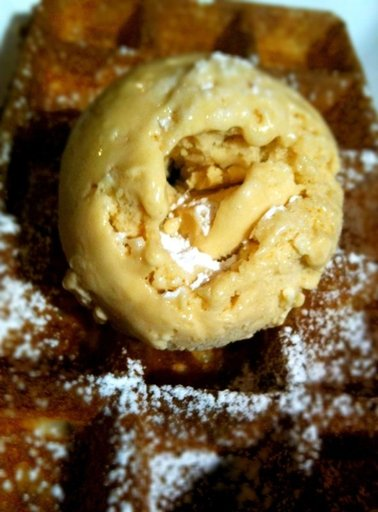

In [ ]:
from PIL import Image
import random

train_img_list = list(train_path.glob('*/*.jpg'))

random_img_path = random.choice(train_img_list)

random_img_class = random_img_path.parent.stem

img = Image.open(random_img_path)

print(f'Image path: {random_img_path}')
print(f'Image class: {random_img_class}')
print(f'Image height: {img.height} Image width: {img.width}')
img

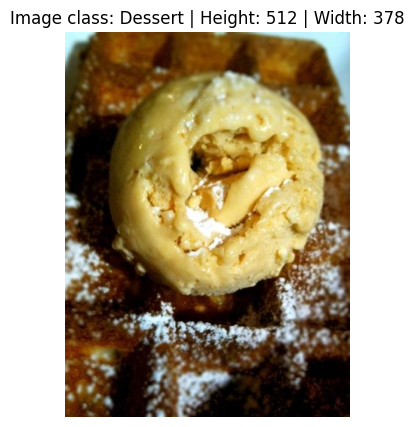

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.imshow(np.asarray(img))
plt.title(f"Image class: {random_img_class} | Height: {img.height} | Width: {img.width}")
plt.axis(False)
plt.show()

array([[[204, 251, 255],
        [203, 250, 255],
        [203, 250, 255],
        ...,
        [184, 236, 249],
        [183, 232, 247],
        [182, 231, 246]],

       [[204, 251, 255],
        [203, 250, 255],
        [202, 249, 255],
        ...,
        [184, 236, 249],
        [183, 232, 247],
        [182, 231, 246]],

       [[203, 250, 255],
        [203, 250, 255],
        [201, 250, 255],
        ...,
        [184, 236, 249],
        [183, 232, 247],
        [182, 231, 246]],

       ...,

       [[ 84,  39,   0],
        [ 83,  38,   0],
        [ 83,  38,   0],
        ...,
        [ 34,  16,   6],
        [ 34,  14,   5],
        [ 33,  15,   5]],

       [[ 80,  36,   0],
        [ 80,  36,   0],
        [ 82,  36,   0],
        ...,
        [ 46,  27,  12],
        [ 44,  22,   8],
        [ 42,  23,   8]],

       [[ 84,  40,   5],
        [ 88,  44,   9],
        [ 93,  47,  11],
        ...,
        [ 43,  22,   5],
        [ 43,  22,   5],
        [ 43,  22,   5]]], dtype=uint8)
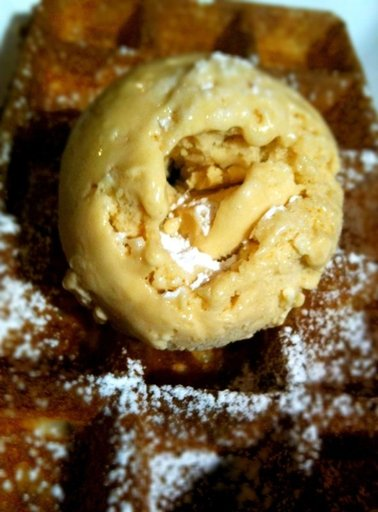

In [ ]:
np.asarray(img)

## Data transformation and augmentation

In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
train_transformer = transforms.Compose(transforms=[transforms.Resize(size=(224, 224)),
                                                  transforms.RandomHorizontalFlip(p=0.3),
                                                  transforms.RandomVerticalFlip(),
                                                  transforms.RandomRotation(20),
                                                  transforms.ColorJitter(brightness=0.2, contrast=0.9),
                                                  transforms.ToTensor(),
                                                  #transforms.Normalize(mean, std)
                                                  ])
test_transformer = transforms.Compose([transforms.Resize((224, 224)),
                                     transforms.ToTensor(),
                                     #transforms.Normalize(mean, std)
                                     ])

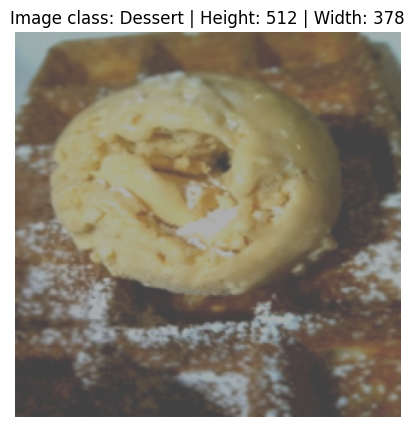

In [ ]:
plt.figure(figsize=(7, 5))
plt.imshow(train_transformer(img).permute(1,2,0))
plt.title(f"Image class: {random_img_class} | Height: {img.height} | Width: {img.width}")
plt.axis(False)
plt.show()

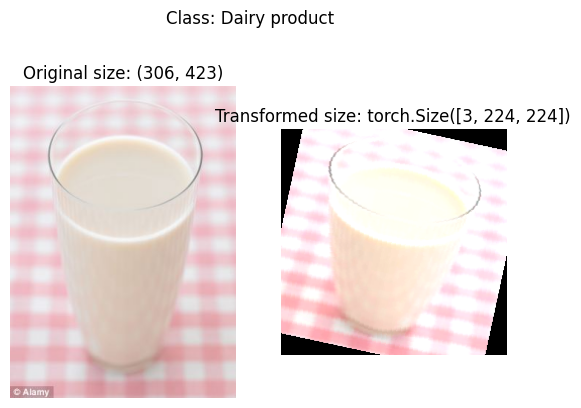

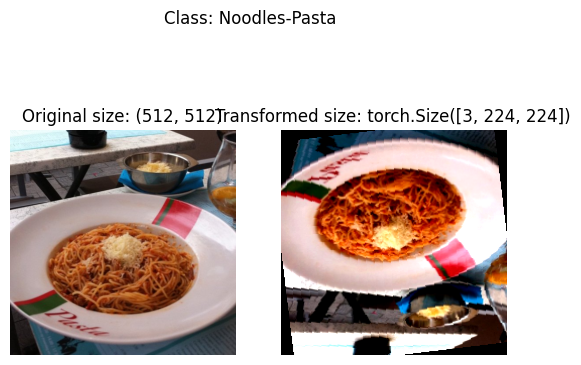

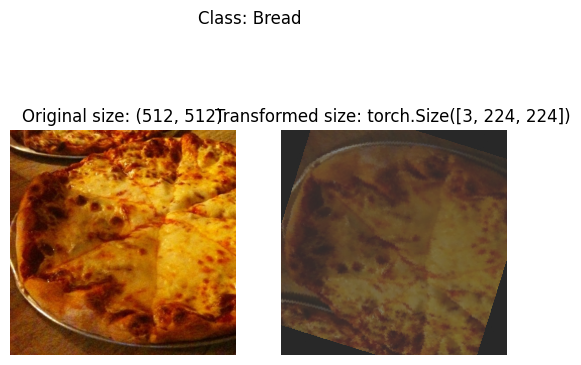

In [ ]:
def plot_transformed_img(img_paths: list, n: int, transform, seed: None):
  if seed:
    random.seed(seed)

  random_img_sample = random.sample(img_paths, k=n)

  for img_path in random_img_sample:
    with Image.open(img_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original size: {f.size}")
      ax[0].axis(False)

      ax[1].imshow(transform(f).permute(1,2,0))
      ax[1].set_title(f"Transformed size: {transform(f).shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class: {img_path.parent.stem}")

plot_transformed_img(img_paths=train_img_list, n=3, transform=train_transformer, seed=None)

## loading image data

In [ ]:
train_data = datasets.ImageFolder(root=train_path,
                                  transform=train_transformer,
                                  target_transform=None)
val_data = datasets.ImageFolder(root=val_path,
                                  transform=test_transformer,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_path,
                                  transform=test_transformer,
                                  target_transform=None)

In [ ]:
len(train_data), len(val_data), len(test_data)

(9866, 3430, 3347)

In [ ]:
labels = train_data.classes
labels

['Bread',
 'Dairy product',
 'Dessert',
 'Egg',
 'Fried food',
 'Meat',
 'Noodles-Pasta',
 'Rice',
 'Seafood',
 'Soup',
 'Vegetable-Fruit']

In [ ]:
num_of_classes = len(labels)
num_of_classes

11

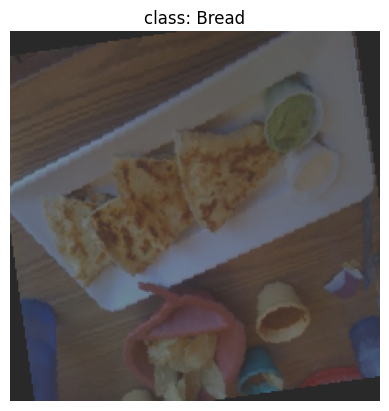

In [ ]:
img, label = train_data[500]

plt.imshow(img.permute(1,2,0))
plt.title(f"class: {labels[label]}")
plt.axis(False)
plt.show()

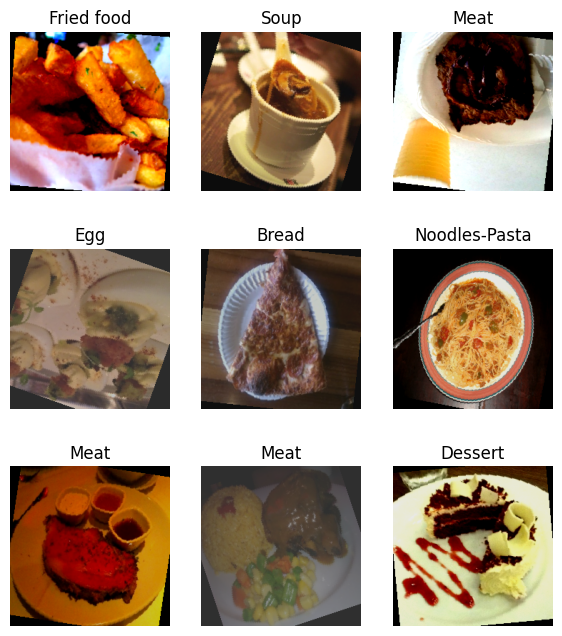

In [ ]:
import torch

# visualized random data from our dataset
nrows, ncols = 3,3
plt.figure(figsize=(7,8))
for i in range(1, ncols*nrows+1):
  plt.subplot(nrows, ncols, i)
  rand = torch.randint(1, len(train_data), size=[1]).item()
  img, lb = train_data[int(rand)]
  plt.imshow(img.permute(1,2,0)) # because matplotlib only supports color channel last format
  plt.title(labels[lb])
  plt.axis(False)

## turning image loaders into dataloaders

In [ ]:
batch_size = 32
train_dl = DataLoader(dataset=train_data,
                      batch_size=batch_size,
                      shuffle=True,
                      num_workers=os.cpu_count())
val_dl = DataLoader(dataset=val_data,
                    batch_size=batch_size,
                    shuffle=False,
                    num_workers=os.cpu_count())

In [ ]:
len(train_dl), len(val_dl)

(309, 108)

In [ ]:
train_batch_img, train_batch_lb = next(iter(train_dl))
train_batch_img.shape, train_batch_lb.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

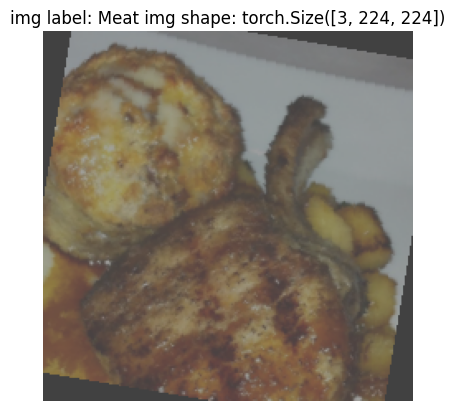

In [ ]:
plt.imshow(train_batch_img[0].permute(1,2,0))
plt.title(f'img label: {labels[train_batch_lb[0]]} img shape: {train_batch_img[0].shape}')
plt.axis(False)

## set device agnostic code

In [ ]:
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## importing efficientnet-b3 model class

In [ ]:
from torchvision.models import (
    efficientnet_b0, EfficientNet_B0_Weights,
    efficientnet_b1, EfficientNet_B1_Weights,
    efficientnet_b2, EfficientNet_B2_Weights,
    efficientnet_b3, EfficientNet_B3_Weights,
    efficientnet_b4, EfficientNet_B4_Weights,
    efficientnet_b5, EfficientNet_B5_Weights,
    efficientnet_b6, EfficientNet_B6_Weights,
    efficientnet_b7, EfficientNet_B7_Weights,
)

class EfficientNetClassifier(nn.Module):
    def __init__(self, num_classes, model_name="b0", pretrained=True):
        super().__init__()

        # Select EfficientNet version
        model_versions = {
                          "b0": (efficientnet_b0, EfficientNet_B0_Weights.IMAGENET1K_V1),
                          "b1": (efficientnet_b1, EfficientNet_B1_Weights.IMAGENET1K_V1),
                          "b2": (efficientnet_b2, EfficientNet_B2_Weights.IMAGENET1K_V1),
                          "b3": (efficientnet_b3, EfficientNet_B3_Weights.IMAGENET1K_V1),
                          "b4": (efficientnet_b4, EfficientNet_B4_Weights.IMAGENET1K_V1),
                          "b5": (efficientnet_b5, EfficientNet_B5_Weights.IMAGENET1K_V1),
                          "b6": (efficientnet_b6, EfficientNet_B6_Weights.IMAGENET1K_V1),
                          "b7": (efficientnet_b7, EfficientNet_B7_Weights.IMAGENET1K_V1),
                          }


        if model_name not in model_versions:
            raise ValueError(f"Unsupported model: {model_name}")

        model_fn, weights = model_versions[model_name]

        # Load pre-trained EfficientNet
        if pretrained:
            self.backbone = model_fn(weights=weights)
        else:
            self.backbone = model_fn(weights=None)

        # Replace the classifier head
        in_features = self.backbone.classifier[1].in_features
        self.backbone.classifier[1] = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.backbone(x)

In [ ]:
model = EfficientNetClassifier(num_classes=num_of_classes, model_name='b3').to(device)
model

Downloading: "https://download.pytorch.org/models/efficientnet_b3_rwightman-b3899882.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b3_rwightman-b3899882.pth


100%|██████████| 47.2M/47.2M [00:00<00:00, 118MB/s]


EfficientNetClassifier(
  (backbone): EfficientNet(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
              (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(40, 10, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(10, 40, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
        

In [ ]:
for param in model.backbone.features.parameters():
  param.requires_grad = True

In [ ]:
loss_fn_eff = nn.CrossEntropyLoss()
optimizer_eff = torch.optim.Adam(params=model.parameters(), lr=0.0001)

## importing mobilenetV2 from pytorch

In [ ]:
import torchvision.models as models

model_mobile = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.DEFAULT).to(device)
model_mobile

Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 104MB/s] 


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [ ]:
loss_fn_mobile = nn.CrossEntropyLoss()
optimizer_mobile = torch.optim.Adam(params=model_mobile.parameters(), lr=0.0001)

## creating tinyVGG CNN model

In [ ]:
# Create our convolutional neural network here architecture is tinyVGG
class tinyVGG(nn.Module):
  def __init__(self, in_shapes:int, hidden_layer:int, out_shapes:int):
    super().__init__()
    self.layer_1 = nn.Sequential(nn.Conv2d(in_channels=in_shapes, out_channels=hidden_layer, kernel_size=3, stride=1, padding=1),
                                 nn.ReLU(),
                                 nn.Conv2d(in_channels=hidden_layer, out_channels=hidden_layer, kernel_size=3, stride=1, padding=1),
                                 nn.ReLU(),
                                 nn.MaxPool2d(kernel_size=2))
    self.layer_2 = nn.Sequential(nn.Conv2d(in_channels=hidden_layer, out_channels=hidden_layer, kernel_size=3, stride=1, padding=1),
                                 nn.ReLU(),
                                 nn.Conv2d(in_channels=hidden_layer, out_channels=hidden_layer, kernel_size=3, stride=1, padding=1),
                                 nn.ReLU(),
                                 nn.MaxPool2d(kernel_size=2))
    self.classification = nn.Sequential(nn.Flatten(),
                                        nn.Linear(in_features=hidden_layer*56*56, # there is tecnique to find 56*56
                                                  out_features=out_shapes))

  def forward(self, x):
    x = self.layer_1(x)
    #print(x.shape)
    x = self.layer_2(x)
    #print(x.shape)
    x = self.classification(x)
    return x

In [ ]:
model_vgg = tinyVGG(in_shapes=3, hidden_layer=20, out_shapes=num_of_classes)
model_vgg

tinyVGG(
  (layer_1): Sequential(
    (0): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classification): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=62720, out_features=11, bias=True)
  )
)

In [ ]:
!pip install torchinfo --quiet

In [ ]:
from torchinfo import summary

summary(model=model_vgg, input_size=(batch_size, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
tinyVGG                                  [32, 11]                  --
├─Sequential: 1-1                        [32, 20, 112, 112]        --
│    └─Conv2d: 2-1                       [32, 20, 224, 224]        560
│    └─ReLU: 2-2                         [32, 20, 224, 224]        --
│    └─Conv2d: 2-3                       [32, 20, 224, 224]        3,620
│    └─ReLU: 2-4                         [32, 20, 224, 224]        --
│    └─MaxPool2d: 2-5                    [32, 20, 112, 112]        --
├─Sequential: 1-2                        [32, 20, 56, 56]          --
│    └─Conv2d: 2-6                       [32, 20, 112, 112]        3,620
│    └─ReLU: 2-7                         [32, 20, 112, 112]        --
│    └─Conv2d: 2-8                       [32, 20, 112, 112]        3,620
│    └─ReLU: 2-9                         [32, 20, 112, 112]        --
│    └─MaxPool2d: 2-10                   [32, 20, 56, 56]          --
├─Seq

In [ ]:
loss_fn_vgg = nn.CrossEntropyLoss()
optimizer_vgg = torch.optim.Adam(params=model_vgg.parameters(), lr=0.0001)

## Essential training functions

In [ ]:
def train_step(model: nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
  # put the model in train mode
  model.train()

  # setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # loop through data loader data batchs
  for batch, (X_train, y_train) in enumerate(dataloader):
    # send the data to the target device
    X_train, y_train = X_train.to(device), y_train.to(device)

    # Forward propagation
    y_logit = model(X_train)

    # calculate the loss
    loss = loss_fn(y_logit, y_train)
    train_loss += loss.item()

    # optimizer zero grad
    optimizer.zero_grad()

    # Back propagation
    loss.backward()

    # optimizer step
    optimizer.step()

    # calculate the accuracy metric
    y_pred = torch.argmax(torch.softmax(y_logit, dim=1), dim=1)
    train_acc += ((y_pred == y_train).sum().item()) / len(y_logit)

  # Adjust metrics to get averge loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)

  return train_loss, train_acc


In [ ]:
def test_step(model: nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: nn.Module,
               device=device):
  # put the model in test / evaluation mode
  model.eval()

  # setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference mode
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(dataloader):
      # send the data to the target device
      X_test, y_test = X_test.to(device), y_test.to(device)

      # Forward pass
      y_logit = model(X_test)

      # Calculate the test loss
      loss = loss_fn(y_logit, y_test)
      test_loss += loss.item()

      # Calculate the test accuracy
      y_pred = torch.argmax(torch.softmax(y_logit, dim=1), dim=1)
      test_acc += ((y_pred == y_test).sum().item()) / len(y_logit)

    # Adjust metrics to get averge loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)

    return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm
# creating our train function
def Train(epochs: int,
          model: nn.Module,
          loss_fn: nn.Module,
          optimizer: torch.optim.Optimizer,
          train_dataloader: torch.utils.data.DataLoader = train_dl,
          test_dataloader: torch.utils.data.DataLoader = val_dl,
          device = device):

  results = {'train_loss': [],
             'train_acc': [],
             'test_loss': [],
             'test_acc': []}

  for epoch in tqdm(range(epochs)):
    # Call train_step()
    train_loss, train_acc = train_step(model=model,
               dataloader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               device=device)

    # Call test_step()
    test_loss, test_acc = test_step(model=model,
              dataloader=test_dataloader,
              loss_fn=loss_fn,
              device=device)

    results['train_loss'].append(train_loss)
    results['train_acc'].append(train_acc)
    results['test_loss'].append(test_loss)
    results['test_acc'].append(test_acc)

    print(f'Epoch: {epoch} | Train loss: {train_loss:.3f} | Test loss: {test_loss:.3f}\n'+
          f'Train accuracy: {train_acc:.3f} | Test accuracy: {test_acc:.3f}')

  return results

In [ ]:
def plot_loss_curve(results: dict[str, list[float]]):
  plt.figure(figsize=(15,7))
  # Plot the loss
  plt.subplot(1,2,1)
  plt.plot(range(len(results['train_loss'])), results['train_loss'][:], label='Train loss')
  plt.plot(range(len(results['test_loss'])), results['test_loss'][:], label='Test loss')
  plt.title("Loss curve")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  # plot the curve
  plt.subplot(1,2,2)
  plt.plot(range(len(results['train_acc'])), results['train_acc'][:], label='Train loss')
  plt.plot(range(len(results['test_acc'])), results['test_acc'][:], label='Test loss')
  plt.title("Accuracy curve")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

### trained with only 5 epochs

In [ ]:
# train efficientnet-b3 weights

from timeit import default_timer as Timer

start_time = Timer()

epochs = 5

results = Train(model=model, epochs=epochs, loss_fn=loss_fn_eff, optimizer=optimizer_eff)

end_time = Timer()

total_time_eff = end_time - start_time
print(f'Total time taken on {device} is {total_time_eff:.4f} seconds')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.251 | Test loss: 0.486
Train accuracy: 0.623 | Test accuracy: 0.859
Epoch: 1 | Train loss: 0.491 | Test loss: 0.329
Train accuracy: 0.844 | Test accuracy: 0.895
Epoch: 2 | Train loss: 0.338 | Test loss: 0.271
Train accuracy: 0.896 | Test accuracy: 0.916
Epoch: 3 | Train loss: 0.252 | Test loss: 0.256
Train accuracy: 0.919 | Test accuracy: 0.919
Epoch: 4 | Train loss: 0.214 | Test loss: 0.237
Train accuracy: 0.931 | Test accuracy: 0.926
Total time taken on cuda is 616.2570 seconds


In [ ]:
# train mobilenet-v2 weights

from timeit import default_timer as Timer

start_time = Timer()

epochs = 5

results_mobile = Train(model=model_mobile, epochs=epochs, loss_fn=loss_fn_mobile, optimizer=optimizer_mobile)

end_time = Timer()

total_time_mobile = end_time - start_time
print(f'Total time taken on {device} is {total_time_mobile:.4f} seconds')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 2.010 | Test loss: 0.636
Train accuracy: 0.579 | Test accuracy: 0.804
Epoch: 1 | Train loss: 0.636 | Test loss: 0.485
Train accuracy: 0.800 | Test accuracy: 0.843
Epoch: 2 | Train loss: 0.502 | Test loss: 0.427
Train accuracy: 0.839 | Test accuracy: 0.861
Epoch: 3 | Train loss: 0.424 | Test loss: 0.383
Train accuracy: 0.862 | Test accuracy: 0.875
Epoch: 4 | Train loss: 0.372 | Test loss: 0.374
Train accuracy: 0.877 | Test accuracy: 0.879
Total time taken on cuda is 445.5158 seconds


In [ ]:
# train tinyVGG weights

from timeit import default_timer as Timer

start_time = Timer()

epochs = 5

results_vgg = Train(model=model_vgg, epochs=epochs, loss_fn=loss_fn_vgg, optimizer=optimizer_vgg)

end_time = Timer()

total_time_vgg = end_time - start_time
print(f'Total time taken on {device} is {total_time_vgg:.4f} seconds')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 2.220 | Test loss: 2.095
Train accuracy: 0.194 | Test accuracy: 0.262
Epoch: 1 | Train loss: 2.098 | Test loss: 1.965
Train accuracy: 0.245 | Test accuracy: 0.305
Epoch: 2 | Train loss: 2.007 | Test loss: 1.907
Train accuracy: 0.288 | Test accuracy: 0.312
Epoch: 3 | Train loss: 1.966 | Test loss: 1.888
Train accuracy: 0.307 | Test accuracy: 0.325
Epoch: 4 | Train loss: 1.932 | Test loss: 1.838
Train accuracy: 0.325 | Test accuracy: 0.347
Total time taken on cuda is 406.0787 seconds


## Model evaluation

### loss and accuracy curve of efficientnet-b3

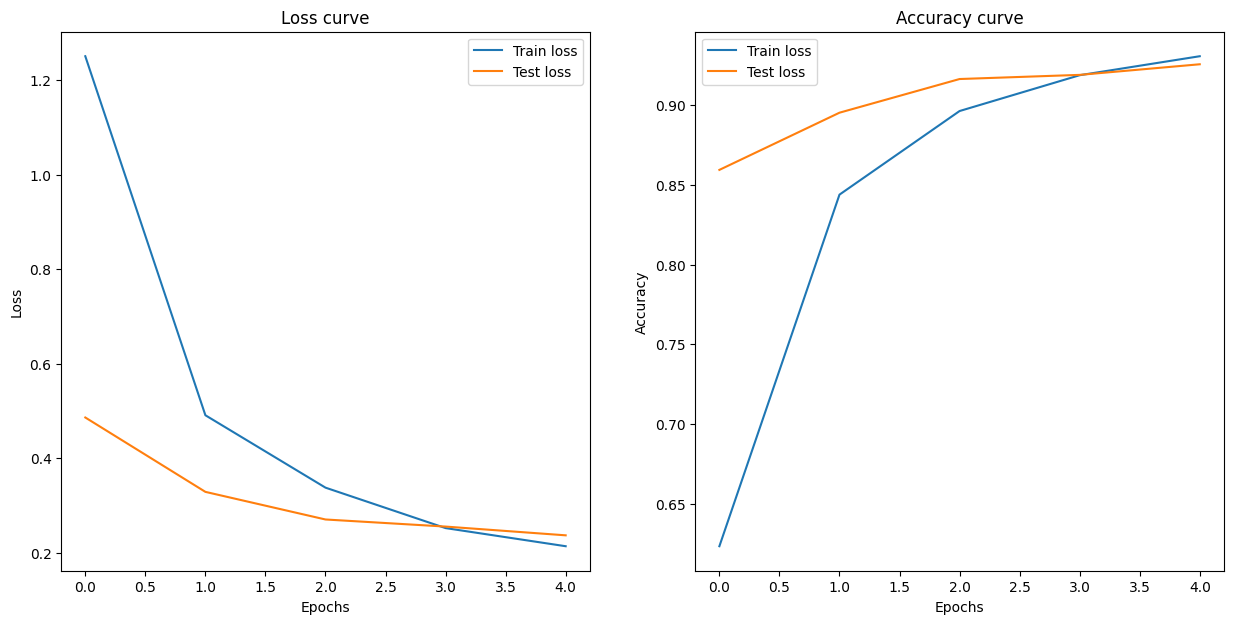

In [ ]:
plot_loss_curve(results=results)

### loss and accuracy curve of mobilenet-v2

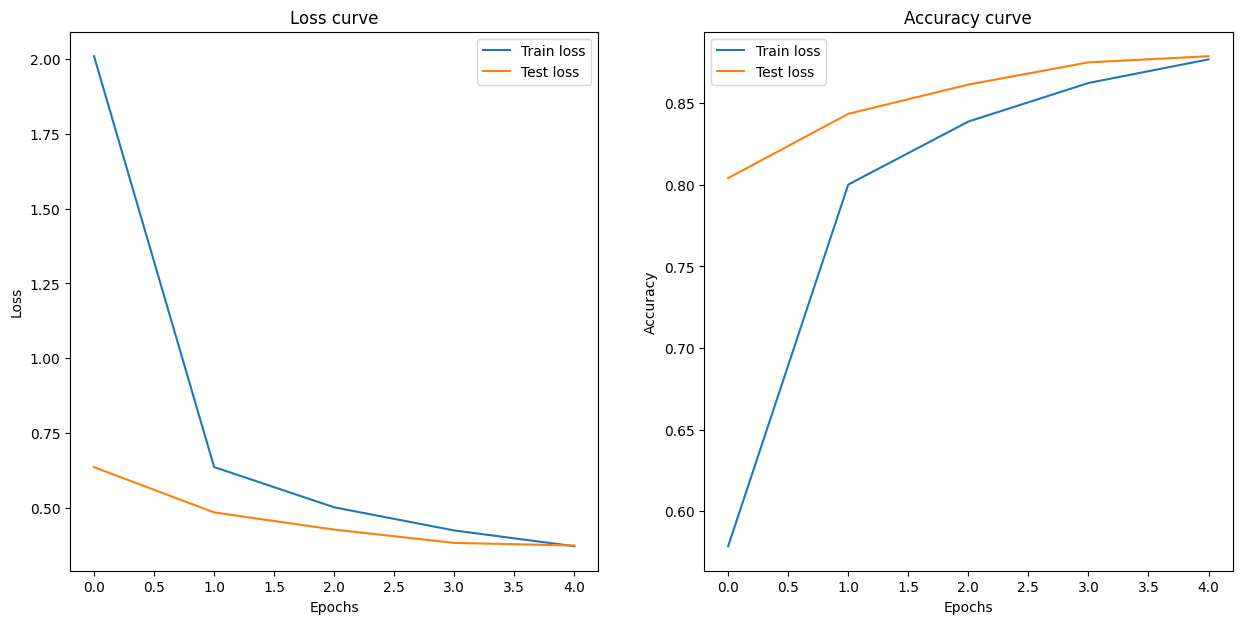

In [ ]:
plot_loss_curve(results=results_mobile)

### loss and accuracy curve of accuracy

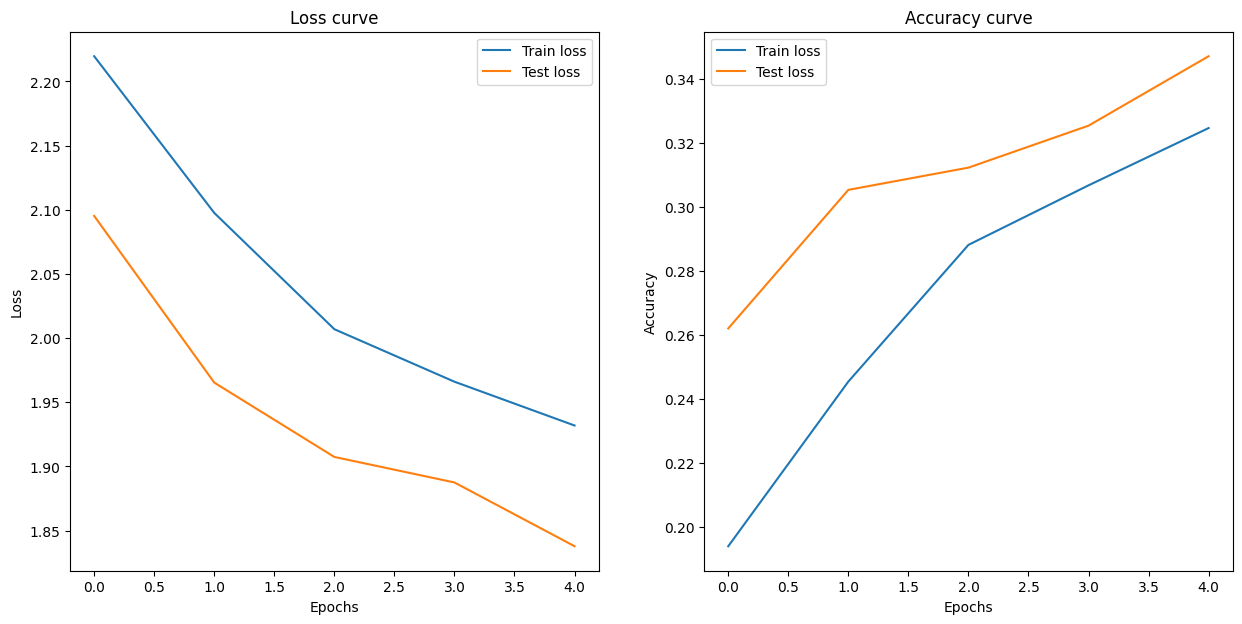

In [ ]:
plot_loss_curve(results=results_vgg)

## found TP, TN, FP, FN from predicted and true values

In [ ]:
len(test_data)

3347

In [ ]:
def get_pred_and_true(model: nn.Module):
  preds = []
  trues = []
  n = len(test_data)

  model.to(device)
  model.eval()

  for i in range(0, n, 1):
    rand_test_img, rand_test_lb = test_data[int(torch.randint(0, len(test_data), size=[1]).item())]

    with torch.inference_mode():
      logit = model(rand_test_img.unsqueeze(dim=0).to(device)).to(device)
    pred = torch.argmax(torch.softmax(logit, dim=1), dim=1)
    true = labels[rand_test_lb]

    # print(f'predicted: {labels[pred]} | true: {true}')
    preds.append(pred)
    trues.append(rand_test_lb)

  return preds, trues

preds_eff, trues_eff = get_pred_and_true(model=model)
preds_mobile, trues_mobile = get_pred_and_true(model=model_mobile)
preds_vgg, trues_vgg = get_pred_and_true(model=model_vgg)

# plt.imshow(rand_test_img.permute(1,2,0))
# plt.title(f"label: {labels[rand_test_lb]} shape: {rand_test_img.shape}")
# plt.axis(False)

In [ ]:
import torch

def get_multiclass_metrics(predictions, targets, num_classes:int = num_of_classes):
    metrics = {}
    for c in range(num_classes):
        # Treat class 'c' as the positive class and all others as negative
        true_positive = torch.sum((predictions == c) & (targets == c)).item()
        false_positive = torch.sum((predictions == c) & (targets != c)).item()
        false_negative = torch.sum((predictions != c) & (targets == c)).item()
        true_negative = torch.sum((predictions != c) & (targets != c)).item()

        # metrics[f'Class {c}'] = {
        #     'TP': true_positive,
        #     'FP': false_positive,
        #     'FN': false_negative,
        #     'TN': true_negative
        # }
    return true_positive, false_positive, false_negative, true_negative

# usage for number of classes
# for efficientnet
targets_multi_eff = torch.tensor(trues_eff)
preds_multi_eff = torch.tensor(preds_eff)

# for mobilenet
targets_multi_mobile = torch.tensor(trues_mobile)
preds_multi_mobile = torch.tensor(preds_mobile)

# for vgg
targets_multi_vgg = torch.tensor(trues_vgg)
preds_multi_vgg = torch.tensor(preds_vgg)

# all_class_metrics = get_multiclass_metrics(preds_multi, targets_multi, num_classes)
# for class_name, values in all_class_metrics.items():
#     print(f"{class_name}: {values}")

TP_eff, FP_eff, FN_eff, TN_eff = get_multiclass_metrics(predictions=preds_multi_eff, targets=targets_multi_eff)
TP_mobile, FP_mobile, FN_mobile, TN_mobile = get_multiclass_metrics(predictions=preds_multi_mobile, targets=targets_multi_mobile)
TP_vgg, FP_vgg, FN_vgg, TN_vgg = get_multiclass_metrics(predictions=preds_multi_vgg, targets=targets_multi_vgg)


### calculate Recall, precision, f1 score, accuracy and specificity

In [ ]:
def calc_recall(true_positive, false_negative):
  return true_positive / (true_positive + false_negative)

recall_eff = calc_recall(TP_eff, FN_eff)
recall_mobile = calc_recall(TP_mobile, FN_mobile)
recall_vgg = calc_recall(TP_vgg, FN_vgg)

In [ ]:
def calc_precision(true_positive, false_positive):
  return true_positive / (true_positive + false_positive)

precision_eff = calc_precision(TP_eff, FP_eff)
precision_mobile = calc_precision(TP_mobile, FP_mobile)
precision_vgg = calc_precision(TP_vgg, FP_vgg)

In [ ]:
def calc_fOneScore(precision, recall):
  return (2*precision*recall) / (precision+recall)

f1_score_eff = calc_fOneScore(precision_eff, recall_eff)
f1_score_mobile = calc_fOneScore(precision_mobile, recall_mobile)
f1_score_vgg = calc_fOneScore(precision_vgg, recall_vgg)

In [ ]:
def calc_accuracy(true_positive, false_positive, false_negative, true_negative):
  return (true_positive + true_negative) / (true_positive+false_positive+false_negative+true_negative)

accuracy_eff = calc_accuracy(TP_eff, FP_eff, FN_eff, TN_eff)
accuracy_mobile = calc_accuracy(TP_mobile, FP_mobile, FN_mobile, TN_mobile)
accuracy_vgg = calc_accuracy(TP_vgg, FP_vgg, FN_vgg, TN_vgg)

In [ ]:
def calc_specificity(true_negative, false_positive):
  return true_negative / (true_negative + false_positive)

specificity_eff = calc_specificity(TN_eff, FP_eff)
specificity_mobile = calc_specificity(TN_mobile, FP_mobile)
specificity_vgg = calc_specificity(TN_vgg, FP_vgg)

In [ ]:
efficientnet_results = {'model_name': 'efficientnet-b3',
                        'Recall': recall_eff,
                        'Precision': precision_eff,
                        'F1-Score': f1_score_eff,
                        'Accuracy': accuracy_eff,
                        'Specificity': specificity_eff,
                        'Training time': total_time_eff}

mobilenet_results = {'model_name': 'mobilenet-v2',
                        'Recall': recall_mobile,
                        'Precision': precision_mobile,
                        'F1-Score': f1_score_mobile,
                        'Accuracy': accuracy_mobile,
                        'Specificity': specificity_mobile,
                        'Training time': total_time_mobile}

tinyvgg_results = {'model_name': 'tinyVGG-16',
                        'Recall': recall_vgg,
                        'Precision': precision_vgg,
                        'F1-Score': f1_score_vgg,
                        'Accuracy': accuracy_vgg,
                        'Specificity': specificity_vgg,
                        'Training time': total_time_vgg}


efficientnet_results, mobilenet_results, tinyvgg_results

({'model_name': 'efficientnet-b3',
  'Recall': 0.9908256880733946,
  'Precision': 0.9557522123893806,
  'F1-Score': 0.9729729729729731,
  'Accuracy': 0.9964146997311025,
  'Specificity': 0.9968040907638223,
  'Training time': 616.256956627},
 {'model_name': 'mobilenet-v2',
  'Recall': 0.9688888888888889,
  'Precision': 0.8825910931174089,
  'F1-Score': 0.923728813559322,
  'Accuracy': 0.9892440991933075,
  'Specificity': 0.9907110826393337,
  'Training time': 445.51583369800005},
 {'model_name': 'tinyVGG-16',
  'Recall': 0.6943231441048034,
  'Precision': 0.5760869565217391,
  'F1-Score': 0.6297029702970296,
  'Accuracy': 0.9441290708096803,
  'Specificity': 0.9624759461193072,
  'Training time': 406.07872504099987})

In [ ]:
import pandas as pd

compare_results = pd.DataFrame([efficientnet_results, mobilenet_results, tinyvgg_results])
compare_results

,model_name,Recall,Precision,F1-Score,Accuracy,Specificity,Training time
0,efficientnet-b3,0.990826,0.955752,0.972973,0.996415,0.996804,616.256957
1,mobilenet-v2,0.968889,0.882591,0.923729,0.989244,0.990711,445.515834
2,tinyVGG-16,0.694323,0.576087,0.629703,0.944129,0.962476,406.078725


Text(0, 0.5, 'model')

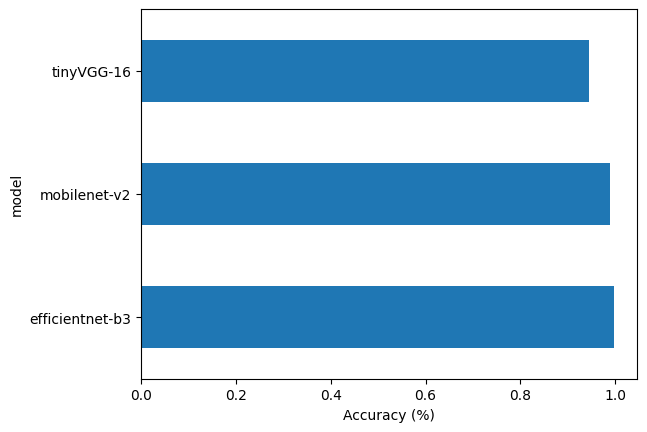

In [ ]:
compare_results.set_index('model_name')["Accuracy"].plot(kind='barh')
plt.xlabel("Accuracy (%)")
plt.ylabel("model")

### Plot confusion matrix

In [ ]:
!pip install torchmetrics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 21.9 MB/s eta 0:00:00


/tmp/ipython-input-575836279.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  con_mat_tensor_eff = con_mat(preds=torch.tensor(preds_multi_eff),
/tmp/ipython-input-575836279.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target=torch.tensor(targets_multi_eff))


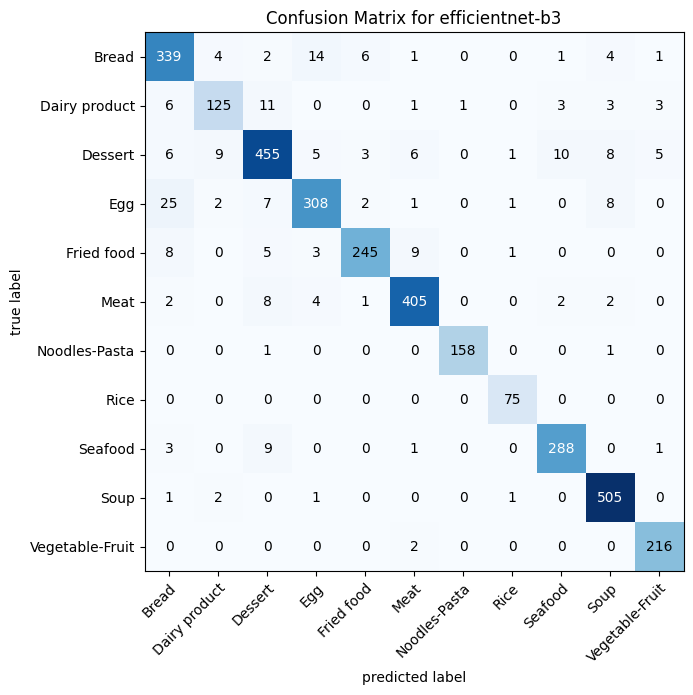

In [ ]:
# plot confusion matrix
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
import numpy as np
import torch
import matplotlib.pyplot as plt

con_mat = ConfusionMatrix(task='multiclass', num_classes=num_of_classes)
con_mat_tensor_eff = con_mat(preds=torch.tensor(preds_multi_eff),
                         target=torch.tensor(targets_multi_eff))

plot, ax = plot_confusion_matrix(conf_mat=con_mat_tensor_eff.numpy(),
                                 class_names=labels,
                                 figsize=(10, 7))
plt.title('Confusion Matrix for efficientnet-b3')
plt.show()

/tmp/ipython-input-2045175761.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  con_mat_tensor_mobile = con_mat(preds=torch.tensor(preds_multi_mobile),
/tmp/ipython-input-2045175761.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target=torch.tensor(targets_multi_mobile))


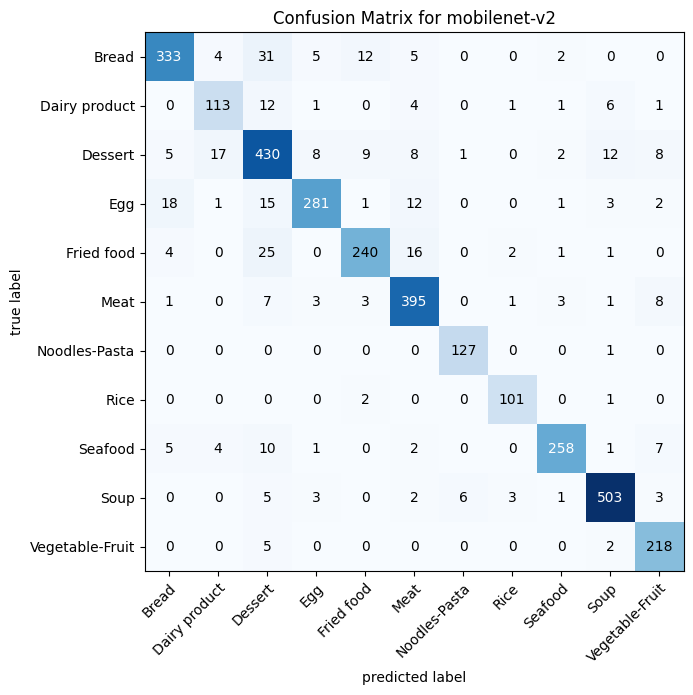

In [ ]:
con_mat_tensor_mobile = con_mat(preds=torch.tensor(preds_multi_mobile),
                         target=torch.tensor(targets_multi_mobile))

plot, ax = plot_confusion_matrix(conf_mat=con_mat_tensor_mobile.numpy(),
                                 class_names=labels,
                                 figsize=(10, 7))
plt.title('Confusion Matrix for mobilenet-v2')
plt.show()

/tmp/ipython-input-1737792768.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  con_mat_tensor_vgg = con_mat(preds=torch.tensor(preds_multi_vgg),
/tmp/ipython-input-1737792768.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target=torch.tensor(targets_multi_vgg))


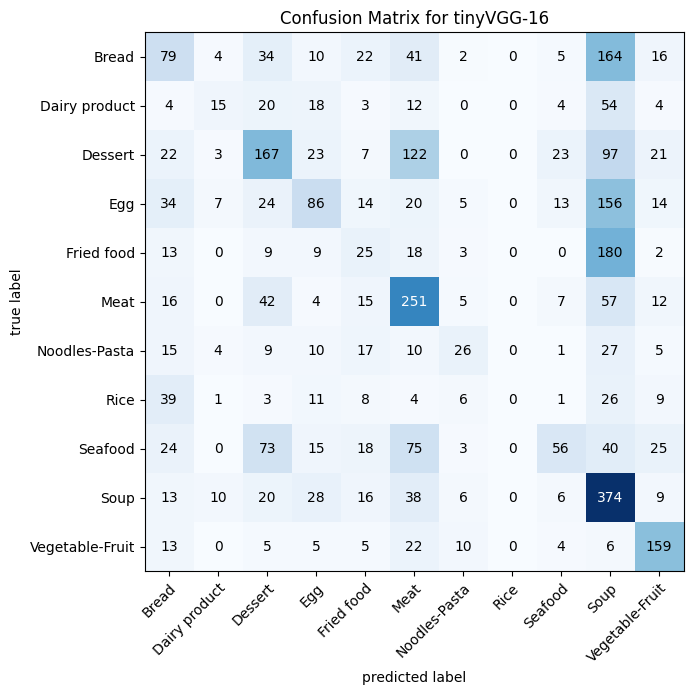

In [ ]:
con_mat_tensor_vgg = con_mat(preds=torch.tensor(preds_multi_vgg),
                         target=torch.tensor(targets_multi_vgg))

plot, ax = plot_confusion_matrix(conf_mat=con_mat_tensor_vgg.numpy(),
                                 class_names=labels,
                                 figsize=(10, 7))
plt.title('Confusion Matrix for tinyVGG-16')
plt.show()

## Saving the best performing model

In [ ]:
def save_model(model: nn.Module, name: str):
  model_dir = Path("Model")
  model_dir.mkdir(parents=True, exist_ok=True)

  model_name = name
  model_path = model_dir / model_name

  torch.save(obj=model.state_dict(), f=model_path)
  print(f'Model is saved in {model_path}')

In [ ]:
# model=model for efficientnet-b3
# model=model_mobile for mobilenet-v2
# model=model_vgg for tinyVGG-16
name = 'efficientnet-b3.pth'
save_model(model=model, name=name)

Model is saved in Model/efficientnet-b3.pth


## load saved model and make a prediction

In [ ]:
# first create an instance of the model
loaded_model = EfficientNetClassifier(num_classes=num_of_classes, model_name='b3', pretrained=True)

# then load the model
loaded_model.load_state_dict(state_dict=torch.load(f=f'./Model/{name}'))
loaded_model.to(device)

EfficientNetClassifier(
  (backbone): EfficientNet(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
              (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(40, 10, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(10, 40, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
        

In [ ]:
import torchvision
def get_prediction(model: nn.Module,
                   img_path,
                   transform,
                   device=device):
  """Makes a prediction on a target image with a trained model and plots the image and prediction"""
  img = torchvision.io.read_image(str(img_path)).type(torch.float32) / 255.
  img = transform(img)
  model.to(device)
  model.eval()
  with torch.inference_mode():
    logit = model(img.unsqueeze(dim=0)).to(device)

  title = f"prediction: {labels[(torch.argmax(torch.softmax(logit, dim=1), dim=1)).cpu()]} | Probability: {(torch.softmax(logit, dim=1).max() *100):.2f}%"

  plt.imshow(img.permute(1,2,0))
  plt.title(title)
  plt.axis(False)
  plt.show()

In [ ]:
custom_image_path = dataset_path / 'pizza_img.jpg'

if not custom_image_path.is_file():
  with open(custom_image_path, 'wb') as f:
    link = 'https://cdn.britannica.com/08/187208-050-E4233521/onions.jpg'
    byte = requests.get(link)
    f.write(byte.content)
else:
  print(f"{custom_image_path} already exists")

In [ ]:
get_prediction(model=loaded_model, img_path=custom_image_path, transform=test_transformer)

TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>